# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Putu Gede Dimas Witjaksana
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apakah ada bulan-bulan tertentu yang memiliki tingkat penggunaan sepeda yang lebih tinggi daripada yang lain? dan berapa jumlah sepeda yang digunakan tiap bulannya?
- Pertanyaan 2 : Bagaimana pengaruh musim terhadap jumlah penggunaan sepeda dan penggunaan sepeda paling banyak pada musim apa?

## Import Semua Packages/Library yang Digunakan

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [207]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [208]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Assessing Data

In [209]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [210]:
day_df.duplicated().sum()

0

In [211]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore ...

In [212]:
day_df.describe(include ="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [213]:
day_df = pd.read_csv("day.csv")

# Dictionary untuk mapping angka musim ke nama musim
season_names = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

In [214]:
# Mengubah nama musim dari angka menjadi nama musim
day_df["season"] = day_df["season"].map(season_names)

# Menampilkan jumlah masing-masing nama musim pada file CSV
season_counts = day_df["season"].value_counts()
print("Jumlah masing-masing nama musim:")
print(season_counts)

Jumlah masing-masing nama musim:
Fall      188
Summer    184
Spring    181
Winter    178
Name: season, dtype: int64


In [215]:
# Membuat tabel silang (crosstab) antara bulan dan musim
season_month_counts = pd.crosstab(day_df["mnth"], day_df["season"])

# Menampilkan hasil
print("Jumlah masing-masing musim pada setiap bulan:")
print(season_month_counts)

Jumlah masing-masing musim pada setiap bulan:
season  Fall  Spring  Summer  Winter
mnth                                
1          0      62       0       0
2          0      57       0       0
3          0      40      22       0
4          0       0      60       0
5          0       0      62       0
6         20       0      40       0
7         62       0       0       0
8         62       0       0       0
9         44       0       0      16
10         0       0       0      62
11         0       0       0      60
12         0      22       0      40


In [216]:
seasonal_usage = day_df.groupby("season")["cnt"].sum()

# Menampilkan hasil
print("Jumlah penggunaan sepeda berdasarkan musim:")
print(seasonal_usage)

Jumlah penggunaan sepeda berdasarkan musim:
season
Fall      1061129
Spring     471348
Summer     918589
Winter     841613
Name: cnt, dtype: int64


In [217]:
# Menghitung jumlah penggunaan sepeda tiap bulan
monthly_usage = day_df.groupby("mnth")["cnt"].sum()

# Menampilkan hasil
print("Jumlah penggunaan sepeda tiap bulan:")
print(monthly_usage)

Jumlah penggunaan sepeda tiap bulan:
mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64


## Visualization & Explanatory Analysis

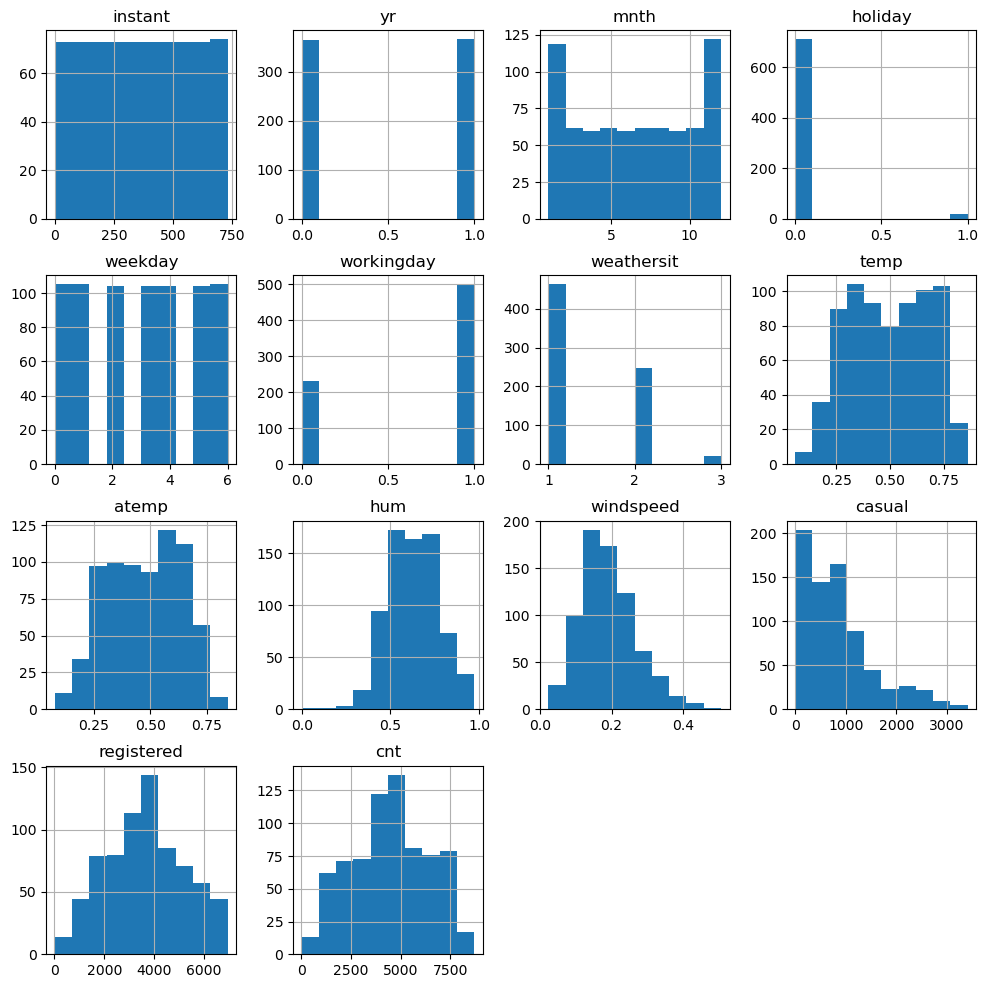

In [218]:
day_df.hist(figsize=(12,12))
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9660\883911628.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = heatmap_data.corr()


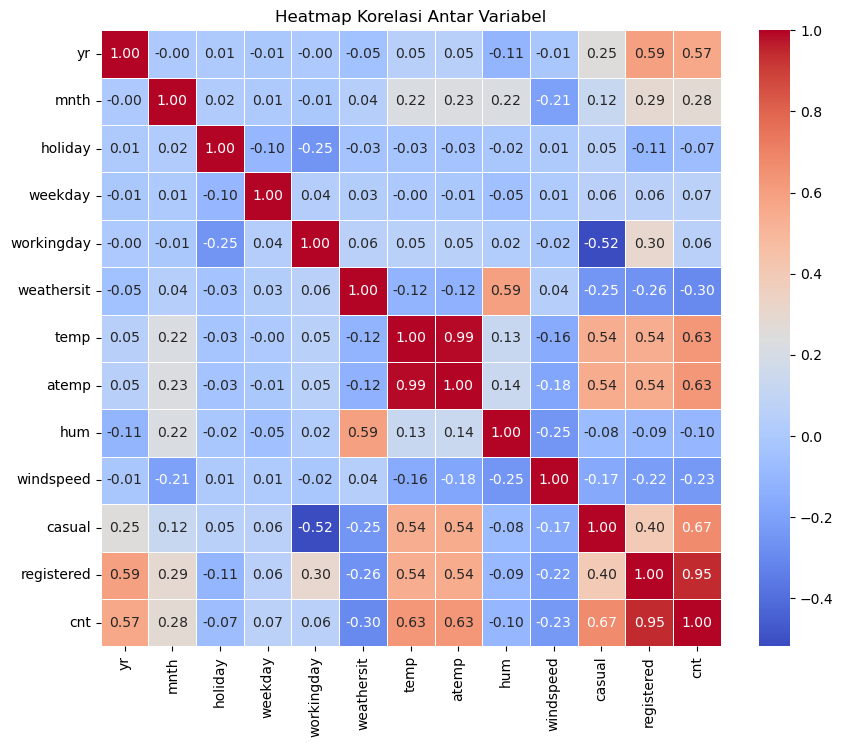

In [219]:
heatmap_data = day_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]

correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

### Pertanyaan 1: Apakah ada bulan-bulan tertentu yang memiliki tingkat penggunaan sepeda yang lebih tinggi daripada yang lain?

In [220]:
month_names = {
    1: "Januari",
    2: "Februari",
    3: "Maret",
    4: "April",
    5: "Mei",
    6: "Juni",
    7: "Juli",
    8: "Agustus",
    9: "September",
    10: "Oktober",
    11: "November",
    12: "Desember"
}

In [221]:
# Menghitung jumlah penggunaan sepeda tiap bulan
monthly_usage = day_df.groupby("mnth")["cnt"].sum().reset_index()

# Mengubah angka bulan menjadi nama bulan
monthly_usage["mnth"] = monthly_usage["mnth"].map(month_names)

print("Jumlah penggunaan sepeda tiap bulan:")
print(monthly_usage)

Jumlah penggunaan sepeda tiap bulan:
         mnth     cnt
0     Januari  134933
1    Februari  151352
2       Maret  228920
3       April  269094
4         Mei  331686
5        Juni  346342
6        Juli  344948
7     Agustus  351194
8   September  345991
9     Oktober  322352
10   November  254831
11   Desember  211036


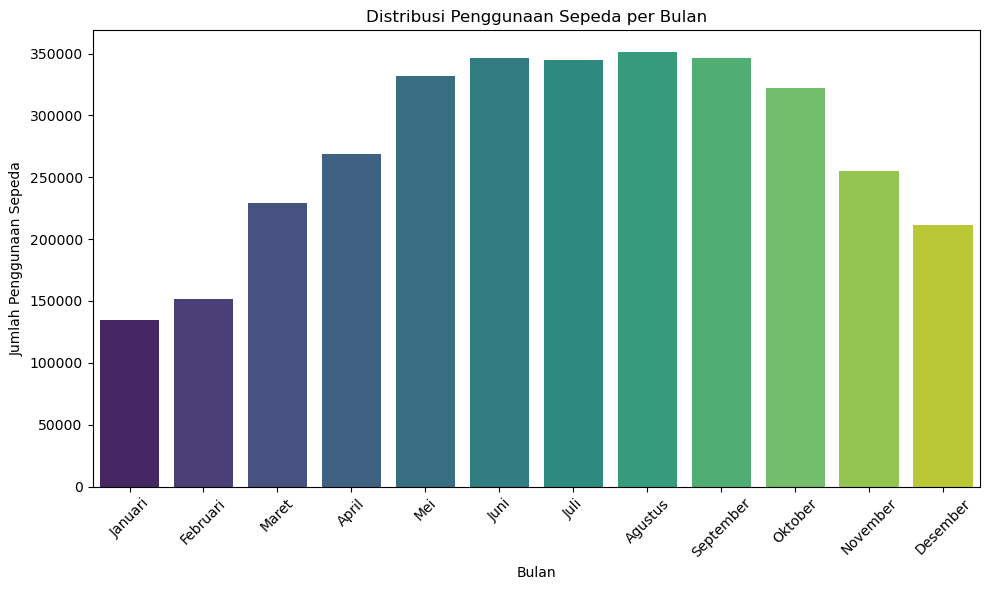

In [222]:
plt.figure(figsize=(10, 6))
sns.barplot(x="mnth", y="cnt", data=monthly_usage, palette="viridis")
plt.title("Distribusi Penggunaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penggunaan Sepeda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [223]:
# Mencari bulan dengan penggunaan sepeda paling tinggi
max_month = monthly_usage.loc[monthly_usage["cnt"].idxmax(), "mnth"]

# Menampilkan hasil
print("Penggunaan sepeda paling tinggi terjadi pada bulan:", max_month)


Penggunaan sepeda paling tinggi terjadi pada bulan: Agustus


### Pertanyaan 2:

In [224]:
seasonal_usage = day_df.groupby("season")["cnt"].sum()

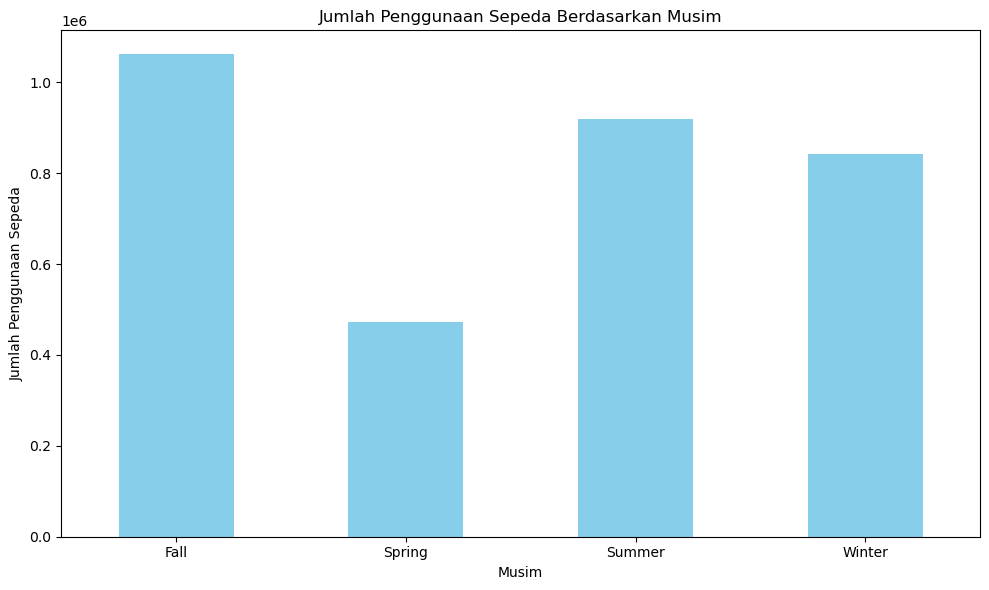

In [225]:
plt.figure(figsize=(10, 6))
seasonal_usage.plot(kind='bar', color='skyblue')
plt.title("Jumlah Penggunaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penggunaan Sepeda")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

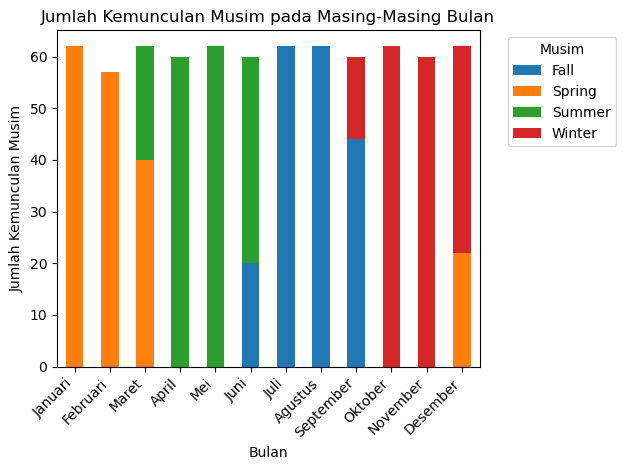

In [226]:
season_counts = day_df.groupby("mnth")["season"].value_counts().unstack().fillna(0)

# Mengubah angka bulan menjadi nama bulan
season_counts.index = season_counts.index.map(month_names)

# Membuat visualisasi menggunakan bar plot
plt.figure(figsize=(12, 6))
season_counts.plot(kind='bar', stacked=True)
plt.title("Jumlah Kemunculan Musim pada Masing-Masing Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Kemunculan Musim")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Musim", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

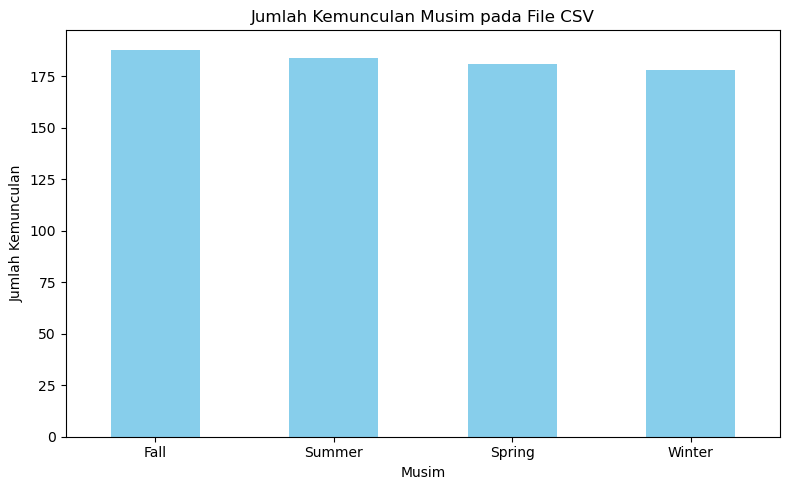

In [234]:
day_df = pd.read_csv("day.csv")

# Dictionary untuk mapping angka musim ke nama musim
season_names = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

day_df["season"] = day_df["season"].map(season_names)

# Menghitung jumlah masing-masing nama musim
season_counts = day_df["season"].value_counts()

# Membuat visualisasi menggunakan bar plot
plt.figure(figsize=(8, 5))
season_counts.plot(kind="bar", color="skyblue")
plt.title("Jumlah Kemunculan Musim pada File CSV")
plt.xlabel("Musim")
plt.ylabel("Jumlah Kemunculan")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

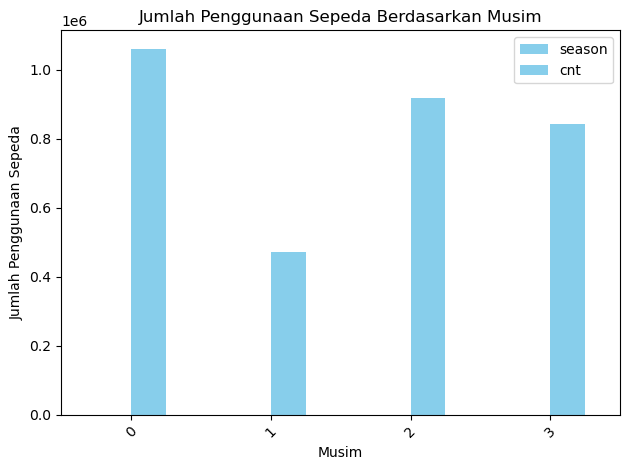

In [235]:
plt.figure(figsize=(10, 6))
seasonal_usage.plot(kind='bar', color='skyblue')
plt.title("Jumlah Penggunaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penggunaan Sepeda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1
> Dari analisis data yang telah dilakukan, dapat disimpulkan bahwa terdapa bulan-bulan tertentu yang memiliki tingkat penggunaan sepeda lebih tinggi daripada bulan-bulan yang lain yaitu bulan mei - bulan oktober dan yang tertinggi adalah pada bulan agustus.
- Conclution pertanyaan 2
> Dari Analisis yang telah dilakukan mengenai penggunaan sepeda berdasarkan musim, dapat disimpulkan jika musim memiliki pengaruh yang signifikan terhadap penggunaan sepeda. dapat dilihat jika penggunaan sepeda paling banyak adalah pada musim fall atau gugur.